# PIE - Regressions

In [40]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
chainages = pandas.read_csv("./Data/chainages.csv",sep=',',decimal=b'.')

listColNames=list(chainages.columns)
print(listColNames)

['Unnamed: 0', 'N° Ligne dernier vol de chainage', 'Identifiant dernier vol', 'Immatriculation', 'Date arrivée réalisée TU', 'Retard_A dernier vol', 'Type avion réalisé']


In [24]:
chainages.head()

,Unnamed: 0,N° Ligne dernier vol de chainage,Identifiant dernier vol,Immatriculation,Date arrivée réalisée TU,Retard_A dernier vol,Type avion réalisé
0,0,472,AF 1006 2009/07/01,FGFKA,2009/07/01,6.0,320
1,1,493,AF 7684 2009/07/01,FGFKD,2009/07/01,0.0,320
2,2,628,AF 2300 2009/07/01,FGFKE,2009/07/01,-1.0,320
3,3,58,AF 1684 2009/07/01,FGFKH,2009/07/01,20.0,320
4,4,165,AF 1905 2009/07/01,FGFKI,2009/07/01,2.0,320


['Unnamed: 0', 'N° Ligne dernier vol de chainage', 'Identifiant dernier vol', 'Immatriculation', 'Date arrivée réalisée TU', 'Retard_A dernier vol', 'Type avion réalisé']
['Unnamed: 0', 'N° Ligne dernier vol de chainage', 'Identifiant dernier vol', 'Immatriculation', 'Retard_A dernier vol', 'Type avion réalisé']
['Unnamed: 0', 'N° Ligne dernier vol de chainage', 'Immatriculation', 'Retard_A dernier vol', 'Type avion réalisé']
['Unnamed: 0', 'N° Ligne dernier vol de chainage', 'Retard_A dernier vol', 'Type avion réalisé']
[[0 472 320]
 [1 493 320]
 [2 628 320]
 ...
 [9810 47013 318]
 [9811 47163 318]
 [9812 46878 318]]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


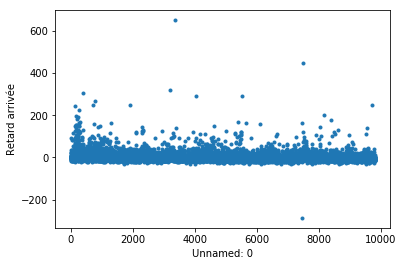

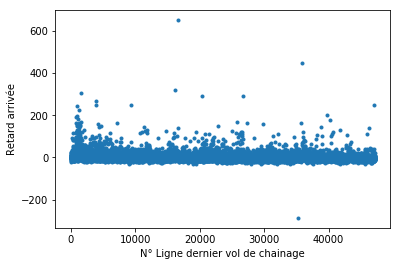

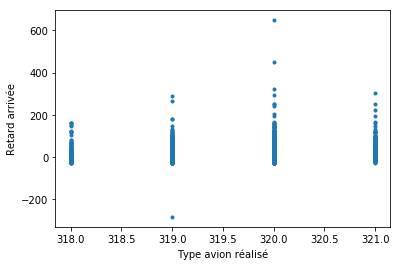

In [37]:
chainages = pandas.read_csv("./Data/chainages.csv",sep=',',decimal=b'.')

listColNames=list(chainages.columns)

XY=chainages.values

Date = listColNames.index('Date arrivée réalisée TU')
listColNames.pop(Date) 
Identifiant = listColNames.index('Identifiant dernier vol')
listColNames.pop(Identifiant)
Immatriculation = listColNames.index('Immatriculation')
listColNames.pop(Immatriculation)  

ColNb_Y=listColNames.index('Retard_A dernier vol')


XY = np.delete(XY, Date, 1)
XY = np.delete(XY, Identifiant, 1)
XY = np.delete(XY, Immatriculation, 1)

Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))



X = np.delete(XY, ColNb_Y, 1)

print(X)
X_scaled = preprocessing.scale(X)

listColNames.pop(ColNb_Y)     

for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Retard arrivée')
  plt.show()

R2: 0.03433523343676814


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


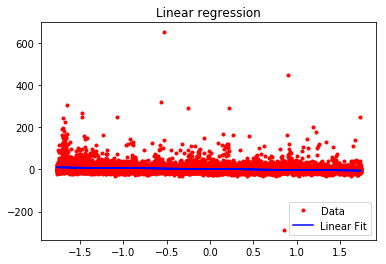

In [41]:
listColNames=list(chainages.columns)

ColNb_x=listColNames.index('N° Ligne dernier vol de chainage')
X=XY[:,ColNb_x].reshape(-1,1)
X_scaled = preprocessing.scale(X)

lr = LinearRegression()
lr.fit(X_scaled, Y) 

Y_pred = lr.predict(X_scaled) 
beta = lr.coef_

R2= r2_score(Y,Y_pred)
print('R2:',R2)

#Representation du resultat
fig = plt.figure()
plt.plot(X_scaled, Y, 'r.')
plt.plot(X_scaled, Y_pred, 'b-')
plt.legend(('Data', 'Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()

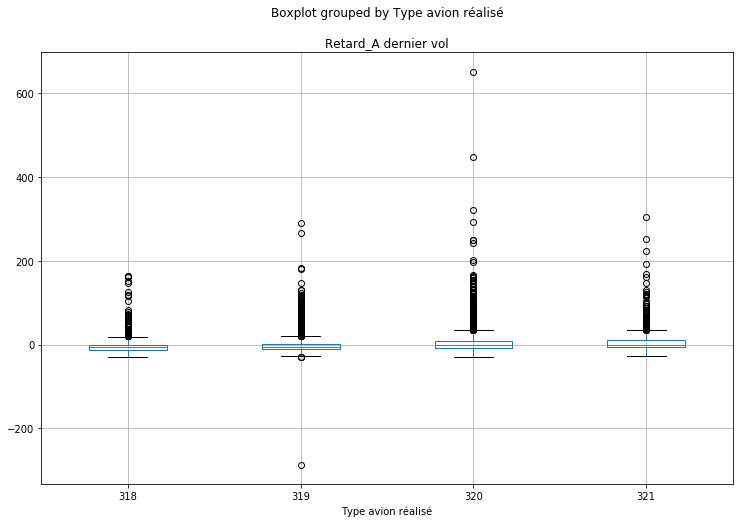

In [43]:
chainages.boxplot('Retard_A dernier vol', by='Type avion réalisé', figsize=(12, 8))
plt.show()